In [14]:
import pandas as pd
data = pd.read_csv('/content/Boston.csv')

In [15]:
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [16]:
data.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [17]:
data.drop(['Unnamed: 0'], axis =1, inplace= True)

In [18]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [19]:
data.shape

(506, 14)

In [20]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [23]:
data1 = data.loc[:, ['lstat', 'medv']]
data1.head()

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


***Visualization***

In [24]:
import matplotlib.pyplot as plt

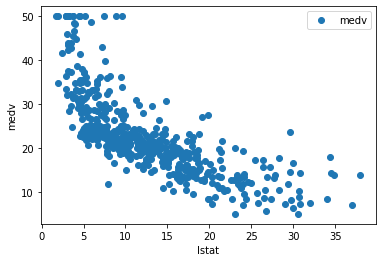

In [25]:
data1.plot(x='lstat', y='medv', style='o')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

***Preparaing Data***

In [26]:
x = pd.DataFrame(data['lstat'])
y = pd.DataFrame(data['medv'])

In [27]:
x.size, y.size

(506, 506)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=1)

In [32]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((354, 1), (152, 1), (354, 1), (152, 1))

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
regressor = LinearRegression()

In [35]:
regressor.fit(x_train, y_train)

LinearRegression()

In [38]:
print(regressor.intercept_)

[34.22183685]


In [39]:
print(regressor.coef_)

[[-0.9166916]]


In [40]:
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])

In [43]:
y_pred.head()

,Predicted
0,27.319149
1,27.639991
2,16.988035
3,26.796635
4,24.880749


In [44]:
from sklearn import metrics

In [45]:
import numpy as np

In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sqaured Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.815209094507989
Mean Squared Error 42.62024347153971
Root Mean Sqaured Error: 6.528418144661057


***Multiple Linear Regression***

In [47]:
dataset = pd.read_csv('Boston.csv')

In [48]:
X= pd.DataFrame(dataset.iloc[:,:-1])
Y= pd.DataFrame(dataset.iloc[:, -1])

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state=5)

In [52]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [53]:
print(regressor.intercept_)

[31.76709614]


In [54]:
print(regressor.coef_)

[[-1.96218501e-03 -1.55305904e-01  4.30838440e-02 -2.54228650e-02
   8.07637360e-01 -1.27137663e+01  4.06442787e+00 -1.25980781e-02
  -1.35433608e+00  3.34180075e-01 -1.21226447e-02 -9.76150705e-01
   1.26842248e-02 -4.63973801e-01]]


In [55]:
Y_pred  = regressor.predict(X_test)

In [56]:
Y_pred = pd.DataFrame(Y_pred, columns= ['predicted_1'])

In [59]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Sqaured Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 3.542831908465017
Mean Squared Error 30.566001737239834
Root Mean Sqaured Error: 5.528652795866262
